<a href="https://colab.research.google.com/github/venkat-siddarth/Enhanced-Naive-Bayes-for-product-recommendation/blob/main/Enhanced_Naive_Bayes_Merged_08_12_2021_(FINAL_102).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import gzip
import html
import unicodedata
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with gzip.open('/content/drive/MyDrive/reviews_Grocery_and_Gourmet_Food_5.json.gz') as f:
  df = pd.read_json(f,lines=True)
df


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",Delicious gluten-free oatmeal: we tried both t...,4,Delicious gluten-free oatmeal 'quick' packs!,1405123200,"07 12, 2014"
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",With the many selections of instant oatmeal ce...,4,Convenient and Instant,1404604800,"07 6, 2014"
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]","While I usually review CDs and DVDs, as well a...",5,Compares favorably in taste and texture with o...,1404172800,"07 1, 2014"
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",My son and I enjoyed these oatmeal packets. H...,4,Pretty good!,1404432000,"07 4, 2014"


In [ ]:
pd.isna(df[['reviewText','overall']])

,reviewText,overall
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
151249,False,False
151250,False,False
151251,False,False
151252,False,False


In [ ]:
df = df.dropna(subset = ["reviewText", "overall"])

In [ ]:
def decode(val):
  k=""
  try:
    k=html.unescape(val)
    k=unicodedata.normalize('NFKD', k).encode('ascii', 'ignore').decode()
  except Exception as error:
    print("Something went wrong "+str(error),val)
  return k

In [ ]:
#Labeling sentiment column based on the star_rating column
df["Sentiment"] = df["overall"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})

In [ ]:
df['short_review'] =df['reviewText'].apply(decode)
df1 = df[["short_review", "Sentiment"]]
#df1.loc[df1["Sentiment"] == 0,]
df1

,short_review,Sentiment
0,Just another flavor of Kit Kat but the taste i...,1
1,I bought this on impulse and it comes from Jap...,1
2,Really good. Great gift for any fan of green t...,1
3,"I had never had it before, was curious to see ...",1
4,I've been looking forward to trying these afte...,1
...,...,...
151249,Delicious gluten-free oatmeal: we tried both t...,1
151250,With the many selections of instant oatmeal ce...,1
151251,"While I usually review CDs and DVDs, as well a...",1
151252,My son and I enjoyed these oatmeal packets. H...,1


In [ ]:
df['short_review']

0         Just another flavor of Kit Kat but the taste i...
1         I bought this on impulse and it comes from Jap...
2         Really good. Great gift for any fan of green t...
3         I had never had it before, was curious to see ...
4         I've been looking forward to trying these afte...
                                ...                        
151249    Delicious gluten-free oatmeal: we tried both t...
151250    With the many selections of instant oatmeal ce...
151251    While I usually review CDs and DVDs, as well a...
151252    My son and I enjoyed these oatmeal packets.  H...
151253    I like to eat oatmeal i the mornings. I usuall...
Name: short_review, Length: 151254, dtype: object

In [ ]:
y = df1.Sentiment
x = df1.drop('Sentiment',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [ ]:
x_train.head()

,short_review
44358,I try to maintain a lower-carb lifestyle than ...
465,A true vanilla-holic I use this vanilla every ...
124588,I hate the fact that people sweat Starbucks. C...
119615,Endorsed by the author of the South Beach Diet...
103574,A good change for a low carb portable breakfas...


In [ ]:
y_train.head()

44358     1
465       1
124588    1
119615    1
103574    1
Name: Sentiment, dtype: int64

In [ ]:
import re
print(x_train.shape)
print(len(x_train))
print(len(y_train))
x_train.iloc[0].str.lower()
p = re.split(r"\W+",str(x_train.iloc[0].str.lower()))

df_list = x_train.values.tolist()
df_list[1][0]

(113440, 1)
113440
113440


"A true vanilla-holic I use this vanilla every day.  I don't even measure I just dump it in.  Love the flavor, aroma, and bean flecks.  I use it in place of vanilla extract all the time. This is a fantastic price for a great quantity. I will be purchasing this again as I'm sure to run out at the speed I'm using it.  Its more of a syrup than a paste really, but it exchanges for extract beautifully.  I usually just take out a bit of sugar from whatever I'm using it in as the paste does contain sugar."

In [ ]:
import re
dic = {}
for i in range(len(x_train)):
    stripped = re.split(r"\W+",df_list[i][0].lower())
    for s in stripped:
            #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
            if not(s.isalpha()) or s in stop_word or len(s)<=2:
                continue
            if s in dic:
                dic[s]+=1
            else:
                dic[s]=1
dic

{'try': 15982,
 'maintain': 246,
 'lower': 1579,
 'carb': 1205,
 'lifestyle': 222,
 'younger': 200,
 'much': 23982,
 'safer': 91,
 'smarter': 26,
 'keep': 7593,
 'non': 2720,
 'perishable': 38,
 'fruit': 8434,
 'leathers': 30,
 'hand': 3172,
 'consumed': 480,
 'slower': 58,
 'pace': 338,
 'normally': 1814,
 'fresh': 9282,
 'fruits': 980,
 'home': 3812,
 'blood': 1169,
 'glucose': 310,
 'target': 240,
 'ranges': 29,
 'agree': 831,
 'preferred': 677,
 'choice': 3122,
 'true': 1764,
 'vanilla': 5843,
 'holic': 24,
 'use': 23354,
 'every': 6413,
 'day': 8397,
 'don': 22659,
 'even': 16120,
 'measure': 482,
 'just': 42561,
 'dump': 335,
 'love': 24611,
 'flavor': 47069,
 'aroma': 2553,
 'bean': 1727,
 'flecks': 59,
 'place': 2185,
 'extract': 1235,
 'time': 16674,
 'fantastic': 1576,
 'price': 14963,
 'great': 34739,
 'quantity': 786,
 'will': 27600,
 'purchasing': 1217,
 'sure': 7473,
 'run': 1819,
 'speed': 111,
 'using': 7809,
 'syrup': 4603,
 'paste': 951,
 'really': 26861,
 'exchanges'

In [ ]:
import operator
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('not', 85505),
 ('like', 71620),
 ('good', 55584),
 ('taste', 53985),
 ('flavor', 47069),
 ('just', 42561),
 ('can', 41704),
 ('coffee', 41506),
 ('one', 40281),
 ('great', 34739),
 ('tea', 32912),
 ('product', 28379),
 ('will', 27600),
 ('really', 26861),
 ('love', 24611),
 ('much', 23982),
 ('use', 23354),
 ('don', 22659),
 ('little', 22500),
 ('get', 22500),
 ('chocolate', 21622),
 ('also', 21456),
 ('sugar', 20325),
 ('make', 19905),
 ('water', 19702),
 ('well', 18585),
 ('cup', 18195),
 ('sweet', 18064),
 ('better', 17749),
 ('drink', 16708),
 ('time', 16674),
 ('even', 16120),
 ('try', 15982),
 ('buy', 15688),
 ('tried', 15642),
 ('nice', 15301),
 ('eat', 15002),
 ('price', 14963),
 ('bit', 14756),
 ('think', 13781),
 ('used', 13387),
 ('tastes', 13128),
 ('find', 12816),
 ('add', 12809),
 ('first', 12774),
 ('bag', 12742),
 ('best', 12687),
 ('way', 12478),
 ('free', 12437),
 ('made', 12251),
 ('box', 12090),
 ('amazon', 12036),
 ('snack', 11832),
 ('organic', 11776),
 ('milk'

0 85505


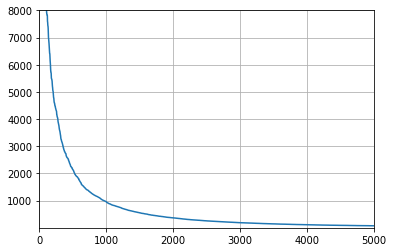

In [ ]:
import matplotlib.pyplot as plt

features=sorted_dic
answer1=[]
answer2=[]
f_len=len(features)
for i in range(f_len):
    answer1.append(i)
    answer2.append(features[i][1])
print(answer1[0],answer2[0])
plt.plot(answer1,answer2)
plt.axis([0,5000,1,8000])
plt.grid()
plt.show()

In [ ]:
features[0][1]

85505

In [ ]:
answer1=[features[i][0] for i in range(4000)] 
answer1

['not',
 'like',
 'good',
 'taste',
 'flavor',
 'just',
 'can',
 'coffee',
 'one',
 'great',
 'tea',
 'product',
 'will',
 'really',
 'love',
 'much',
 'use',
 'don',
 'little',
 'get',
 'chocolate',
 'also',
 'sugar',
 'make',
 'water',
 'well',
 'cup',
 'sweet',
 'better',
 'drink',
 'time',
 'even',
 'try',
 'buy',
 'tried',
 'nice',
 'eat',
 'price',
 'bit',
 'think',
 'used',
 'tastes',
 'find',
 'add',
 'first',
 'bag',
 'best',
 'way',
 'free',
 'made',
 'box',
 'amazon',
 'snack',
 'organic',
 'milk',
 'food',
 'now',
 'something',
 'want',
 'found',
 'delicious',
 'still',
 'calories',
 'mix',
 'oil',
 'lot',
 'flavors',
 'hot',
 'many',
 'two',
 'didn',
 'since',
 'sauce',
 'enough',
 'without',
 'tasty',
 'makes',
 'fresh',
 'ingredients',
 'know',
 'less',
 'easy',
 'say',
 'healthy',
 'brand',
 'right',
 'recommend',
 'though',
 'whole',
 'strong',
 'favorite',
 'salt',
 'butter',
 'however',
 'pretty',
 'texture',
 'need',
 'fruit',
 'day',
 'cookies',
 'coconut',
 'give'

In [ ]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=df_list[i][0].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1


In [ ]:
x_train_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
df_list_test = x_test.values.tolist()

x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=df_list_test[i][0].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1
          
        #not a stopword
        #we can append the word which is not existing

In [ ]:
x_test_dataset

array([[2, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [4, 3, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

standard

In [ ]:
def probability(x_test,dic,classes):
    prob=dic[classes]["length"]/dic["total_doc"]
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            continue
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=num/den
        prob*=current_prob
    return prob

In [ ]:
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [ ]:
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [ ]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

enhanced

In [ ]:

def probability_en(x_test,dic,classes,tot_words):
    #tot_words=0
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            m_uni=len(dic[classes].keys())-2
            count_wi=0
            """for i in tot_classes:
              if i=="total_doc":
                continue"""       
            count_wi=sorted_dic[j][1]
              #tot_words+=dic[i]["word_in_class"]
            num=dic[classes][feature[j]]+m_uni*(count_wi/tot_words)
            den=dic[classes]["word_in_class"]+m_uni
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [ ]:
def predict_for_single_en(x_test,dic,tot_words):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability_en(x_test,dic,i,tot_words)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [ ]:
def predict_en(x_test,dic,tot_words):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single_en(x,dic,tot_words))
    return y_pred

JM SMOOTHING

In [ ]:
def probability_jm(x_test,dic,classes,tot_words,lam=0.5):
    #tot_words=0
    prob=dic[classes]["length"]/dic["total_doc"]
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
          continue
        else:
            #Extra addition part is Laplace correction
            m_uni=len(dic[classes].keys())-2
            count_wi=0
            """for i in tot_classes:
              if i=="total_doc":
                continue"""       
            count_wi=sorted_dic[j][1]
              #tot_words+=dic[i]["word_in_class"]
            num=(dic[classes][feature[j]]/dic[classes]["word_in_class"])+(count_wi/tot_words)
            current_prob=num*0.5
        prob*=current_prob
    return prob

In [ ]:
def predict_for_single_jm(x_test,dic,tot_words):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability_jm(x_test,dic,i,tot_words)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [ ]:
def predict_jm(x_test,dic,tot_words):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single_jm(x,dic,tot_words))
    return y_pred

In [ ]:
a = fit(x_train_dataset,y_train)
y_pred = predict(x_test_dataset, a)

In [ ]:
tot_words=0;
for i in a.keys():
  if i=="total_doc":
    continue  
  tot_words+=a[i]["word_in_class"]
y_pred_en = predict_en(x_test_dataset, a,tot_words)

In [ ]:
tot_words=0;
for i in a.keys():
  if i=="total_doc":
    continue  
  tot_words+=a[i]["word_in_class"]
y_pred_jm = predict_jm(x_test_dataset, a,tot_words)

In [ ]:
a

{0: {'not': 12341,
  'like': 8917,
  'good': 3783,
  'taste': 7566,
  'flavor': 5015,
  'just': 4799,
  'can': 3802,
  'coffee': 3641,
  'one': 4199,
  'great': 1228,
  'tea': 2910,
  'product': 4112,
  'will': 2515,
  'really': 2827,
  'love': 1617,
  'much': 2748,
  'use': 1533,
  'don': 2687,
  'little': 1657,
  'get': 2294,
  'chocolate': 2152,
  'also': 1717,
  'sugar': 2387,
  'make': 1554,
  'water': 2302,
  'well': 1397,
  'cup': 1580,
  'sweet': 1681,
  'better': 1975,
  'drink': 2105,
  'time': 1377,
  'even': 2376,
  'try': 1788,
  'buy': 1760,
  'tried': 1948,
  'nice': 569,
  'eat': 1511,
  'price': 877,
  'bit': 996,
  'think': 1499,
  'used': 1194,
  'tastes': 1602,
  'find': 1041,
  'add': 796,
  'first': 1722,
  'bag': 1161,
  'best': 621,
  'way': 1399,
  'free': 1009,
  'made': 1374,
  'box': 1456,
  'amazon': 1119,
  'snack': 628,
  'organic': 988,
  'milk': 991,
  'food': 1415,
  'now': 1081,
  'something': 1531,
  'want': 1109,
  'found': 1082,
  'delicious': 292,

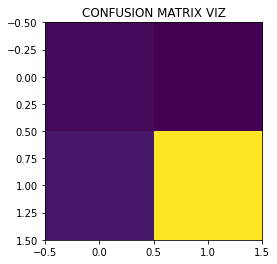

Confusion Matrix
 [[ 2120  1356]
 [ 3268 31070]]
***************************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.39      0.61      0.48      3476
           1       0.96      0.90      0.93     34338

    accuracy                           0.88     37814
   macro avg       0.68      0.76      0.70     37814
weighted avg       0.91      0.88      0.89     37814

***************************************************************************
SCORE:  0.8777172475802613


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

as_laplace = accuracy_score(y_test,y_pred)
ps_laplace = precision_score(y_test,y_pred)
rs_laplace = recall_score(y_test,y_pred)
fs_laplace = f1_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation = 'nearest')
plt.title( "CONFUSION MATRIX VIZ" )
plt.show()
print("Confusion Matrix\n",cm)
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, y_pred))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, y_pred))


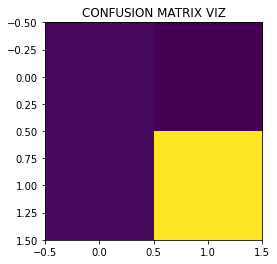

Confusion Matrix
 [[ 2088  1388]
 [ 2201 32137]]
***************************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.49      0.60      0.54      3476
           1       0.96      0.94      0.95     34338

    accuracy                           0.91     37814
   macro avg       0.72      0.77      0.74     37814
weighted avg       0.92      0.91      0.91     37814

***************************************************************************
SCORE:  0.9050880626223092


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

as_en = accuracy_score(y_test,y_pred_en)
ps_en = precision_score(y_test,y_pred_en)
rs_en = recall_score(y_test,y_pred_en)
fs_en = f1_score(y_test,y_pred_en)
cm=confusion_matrix(y_test, y_pred_en)
plt.imshow(cm, interpolation = 'nearest')
plt.title( "CONFUSION MATRIX VIZ" )
plt.show()
print("Confusion Matrix\n",cm)
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, y_pred_en))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, y_pred_en))

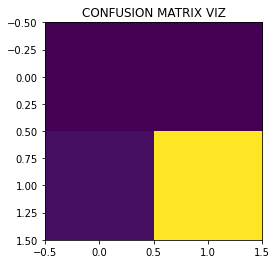

Confusion Matrix
 [[ 1720  1756]
 [ 2782 31556]]
***************************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.38      0.49      0.43      3476
           1       0.95      0.92      0.93     34338

    accuracy                           0.88     37814
   macro avg       0.66      0.71      0.68     37814
weighted avg       0.90      0.88      0.89     37814

***************************************************************************
SCORE:  0.8799915375257841


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

as_jm = accuracy_score(y_test,y_pred_jm)
ps_jm = precision_score(y_test,y_pred_jm)
rs_jm = recall_score(y_test,y_pred_jm)
fs_jm = f1_score(y_test,y_pred_jm)
cm=confusion_matrix(y_test, y_pred_jm)
plt.imshow(cm, interpolation = 'nearest')
plt.title( "CONFUSION MATRIX VIZ" )
plt.show()
print("Confusion Matrix\n",cm)
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, y_pred_jm))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, y_pred_jm))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_dataset,y_train)
Y_Pred = model.predict(x_test_dataset)

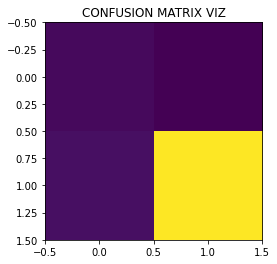

Confusion Matrix
 [[ 2113  1363]
 [ 2569 31769]]
***************************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      3476
           1       0.96      0.93      0.94     34338

    accuracy                           0.90     37814
   macro avg       0.71      0.77      0.73     37814
weighted avg       0.91      0.90      0.90     37814

***************************************************************************
SCORE:  0.8960173480721426


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

as_st = accuracy_score(y_test,Y_Pred)
ps_st = precision_score(y_test,Y_Pred)
rs_st = recall_score(y_test,Y_Pred)
fs_st = f1_score(y_test,Y_Pred)
cm=confusion_matrix(y_test, Y_Pred)
plt.imshow(cm, interpolation = 'nearest')
plt.title( "CONFUSION MATRIX VIZ" )
plt.show()
print("Confusion Matrix\n",cm)
print("***************************************************************************")
print("Classification Report\n",classification_report(y_test, Y_Pred))
print("***************************************************************************")
print("SCORE: ",accuracy_score(y_test, Y_Pred))

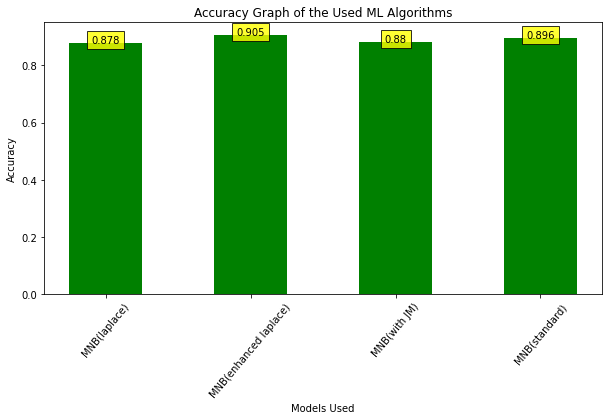

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],3), ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))

fig = plt.figure(figsize = (10, 5))
model_used = ['MNB(laplace)','MNB(enhanced laplace)','MNB(with JM)','MNB(standard)']
model_result_accuracy = [as_laplace, as_en, as_jm, as_st]

plt.bar(model_used,model_result_accuracy, color ='green',
            width = 0.5)
addlabels(model_used, model_result_accuracy)

plt.xticks(rotation=50)
plt.xlabel("Models Used")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph of the Used ML Algorithms")
plt.show()

In [ ]:
d=[['MNB(laplace)',as_laplace,ps_laplace,rs_laplace,fs_laplace],['MNB(enhanced laplace)',as_en,ps_en,rs_en,fs_en],['MNB(with JM)',as_jm,ps_jm,rs_jm,fs_jm],['MNB(standard)',as_st,ps_st,rs_st,fs_st]]
df=pd.DataFrame(d, columns = ['Algorithm','Accuracy Score','Precision Score','Recall Score','f1 Score'])
df.set_index('Algorithm',inplace=True)
df

,Accuracy Score,Precision Score,Recall Score,f1 Score
Algorithm,,,,
MNB(laplace),0.877717,0.958182,0.904828,0.930741
MNB(enhanced laplace),0.905088,0.958598,0.935902,0.947114
MNB(with JM),0.879992,0.947286,0.918982,0.932919
MNB(standard),0.896017,0.958862,0.925185,0.941722


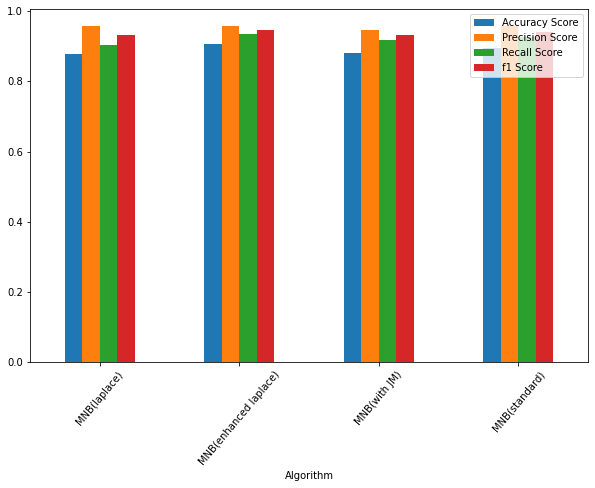

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6.5]
df.plot.bar()
plt.xticks(rotation=50)
plt.show()